In [35]:
import h5py
import matplotlib.pyplot as plt
import os
import numpy as np
import glob
%matplotlib inline

In [36]:
# Function to visualize a single dataset
def plot_data(ax, data, title, cmap='viridis'):
    im = ax.imshow(data, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')
    plt.colorbar(im, ax=ax, shrink=0.8)

In [37]:
file_path = r'C:\Users\uditt\Downloads\archive (1)'
os.chdir(file_path)

In [38]:
# Define paths
path_single = r"c:\Users\uditt\Downloads\archive (1)\TrainData\img\image (7).h5"
path_single_mask = r"C:\Users\uditt\Downloads\archive (1)\TrainData\mask\mask (1).h5"

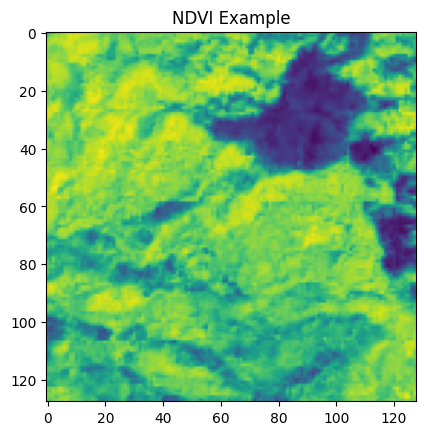

In [39]:
# Visualize a single image and its NDVI
f_data = np.zeros((1, 128, 128, 3))
with h5py.File(path_single) as hdf:
    data = np.array(hdf.get('img'))
    data = data.astype('float64')
    data_red = data[:, :, 3]
    data_nir = data[:, :, 7]
    data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))
    plt.imshow(data_ndvi)
    plt.title("NDVI Example")
    plt.show()

ls ['mask']
input data shape: (128, 128)


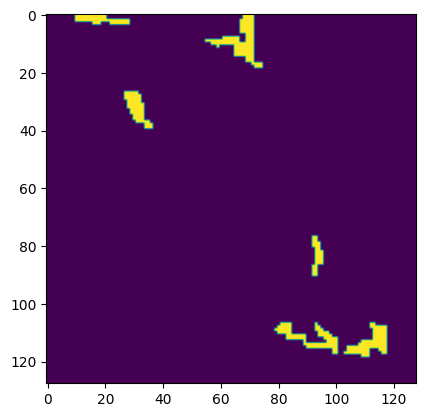

In [40]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [41]:
TRAIN_PATH = r"C:\Users\uditt\Downloads\archive (1)\TrainData\img\*"
TRAIN_MASK = r'C:\Users\uditt\Downloads\archive (1)\TrainData\mask\*'

# Initialize arrays for images and masks
TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))

# Load image and mask paths
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

# Process data
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    with h5py.File(img) as hdf:
        data = np.array(hdf.get('img'))
        data[np.isnan(data)] = 0.000001
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb
        TRAIN_XX[i, :, :, 3] = data_ndvi
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation

    with h5py.File(mask) as hdf:
        data = np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data


C:\Users\uditt\AppData\Local\Temp\ipykernel_10020\1320599152.py:22: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))
C:\Users\uditt\AppData\Local\Temp\ipykernel_10020\1320599152.py:27: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope


In [42]:
# TRAIN_XX_n = TRAIN_XX / TRAIN_XX.max()
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.6452268111035884].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7002540220152413].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8966131907308378].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.6788177339901478].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.6086956521739131].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.6320899335717935].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Go

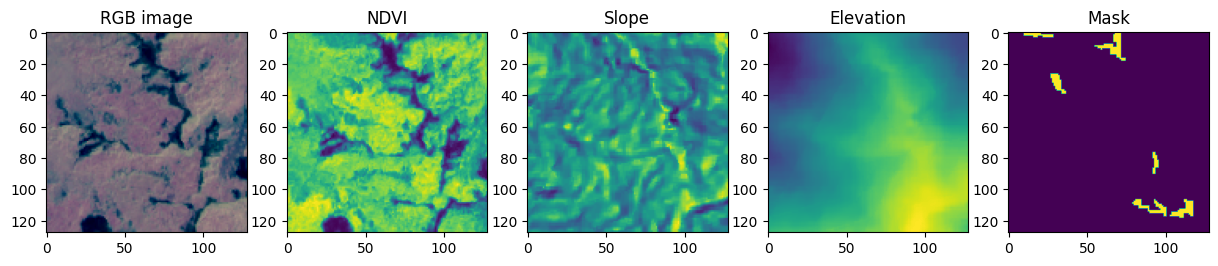

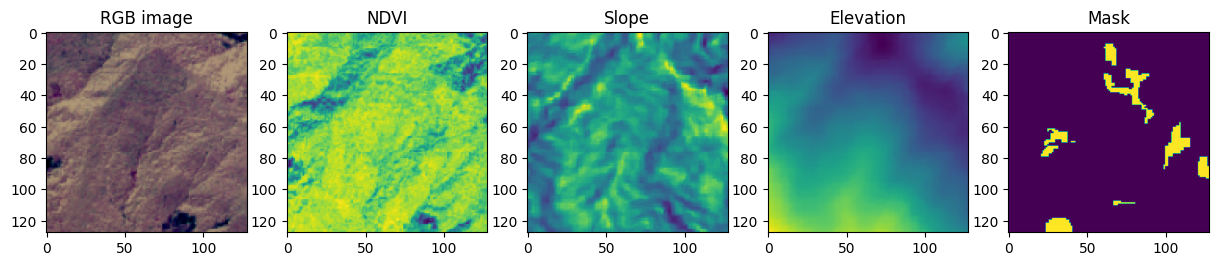

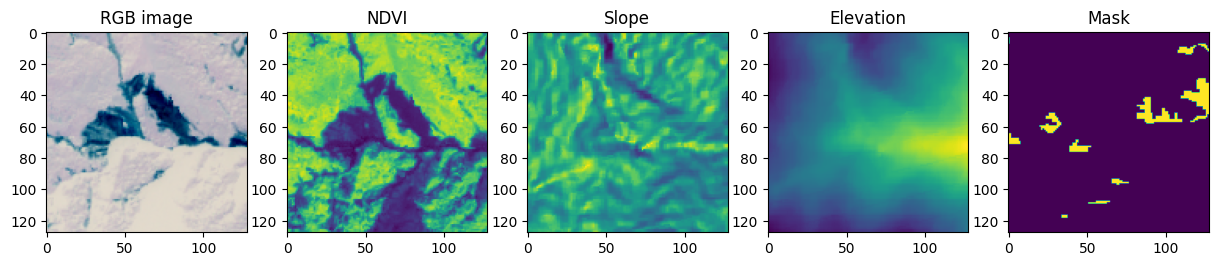

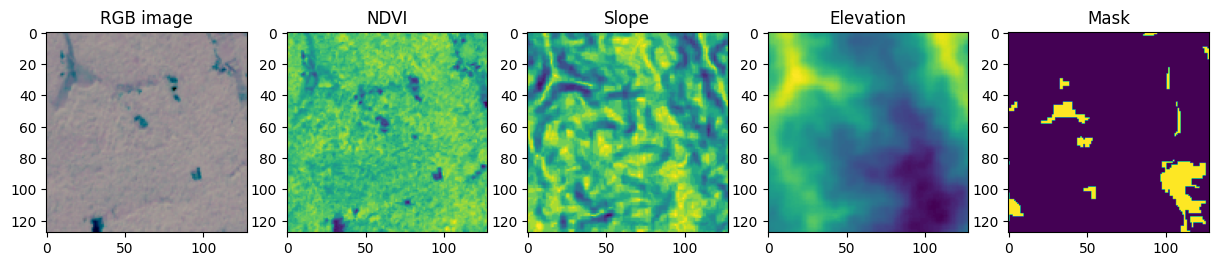

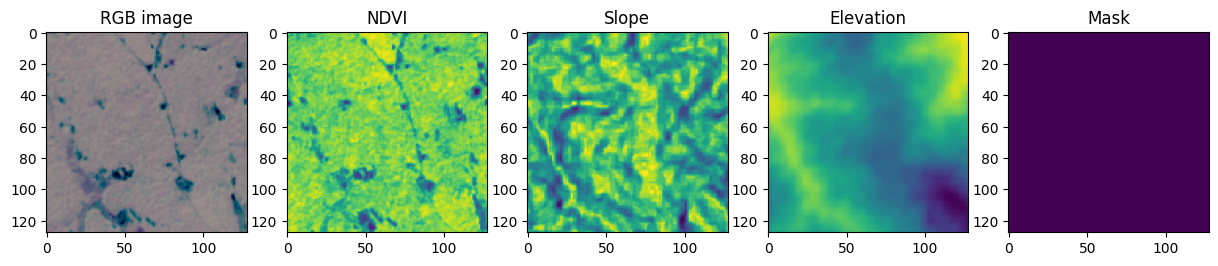

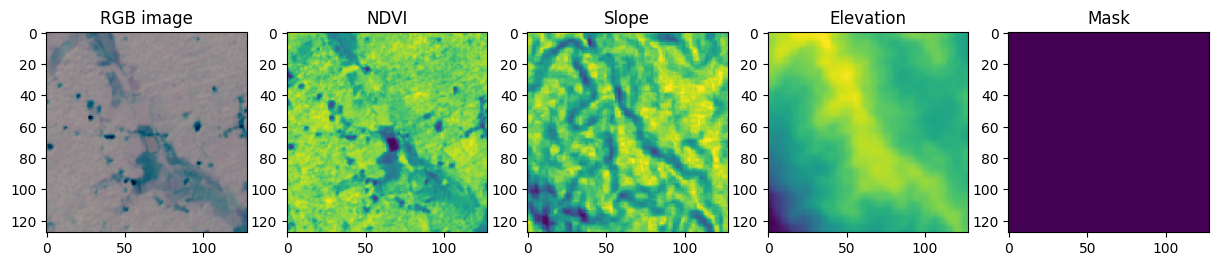

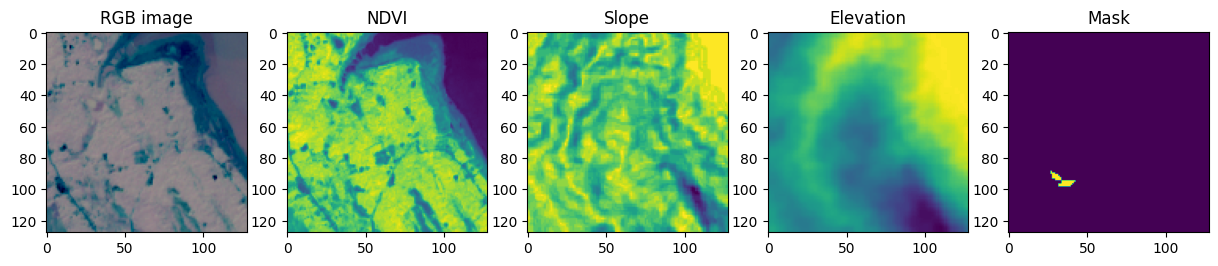

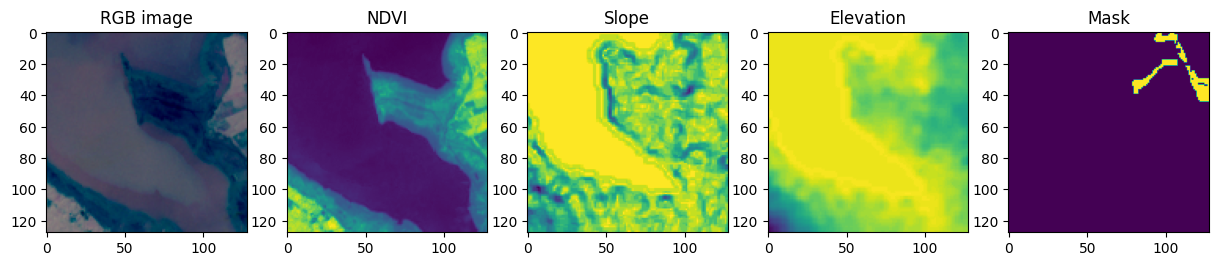

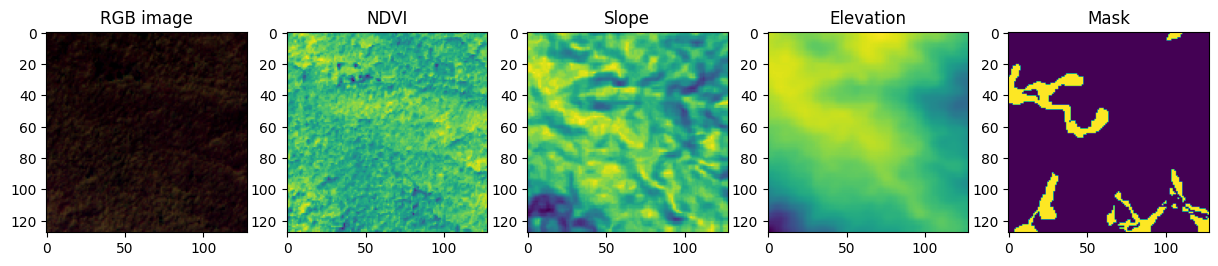

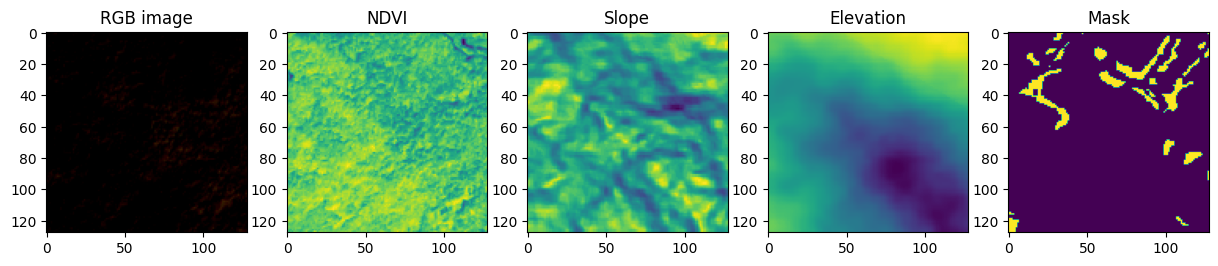

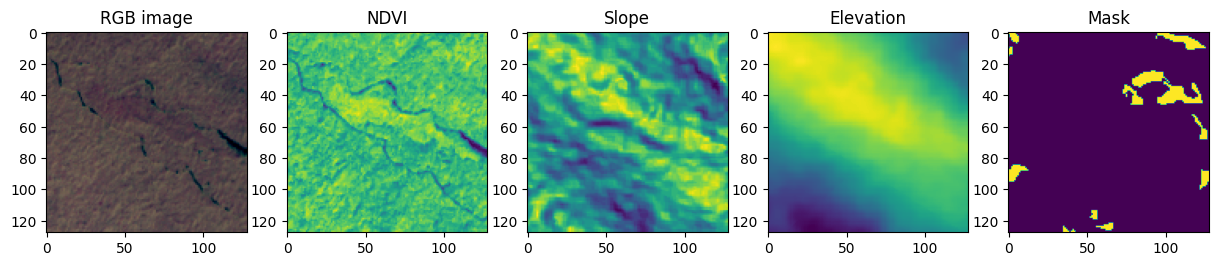

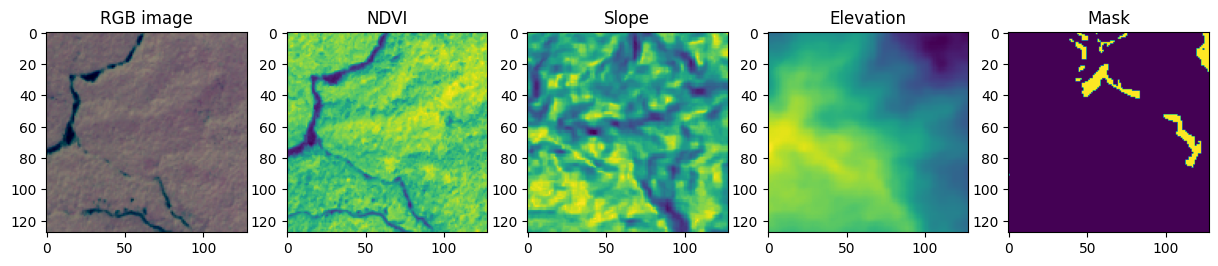

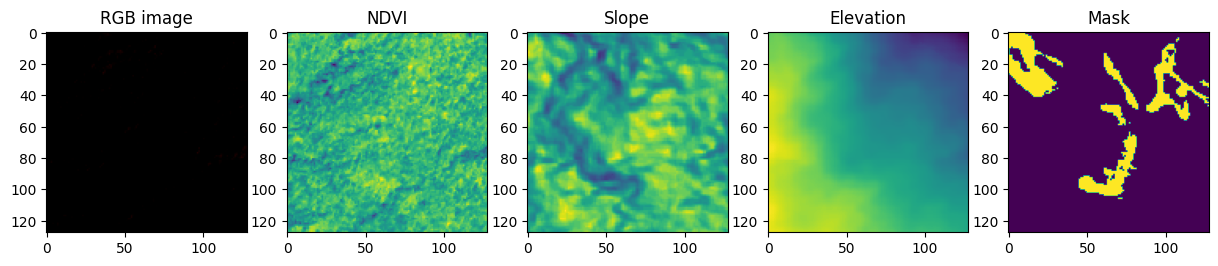

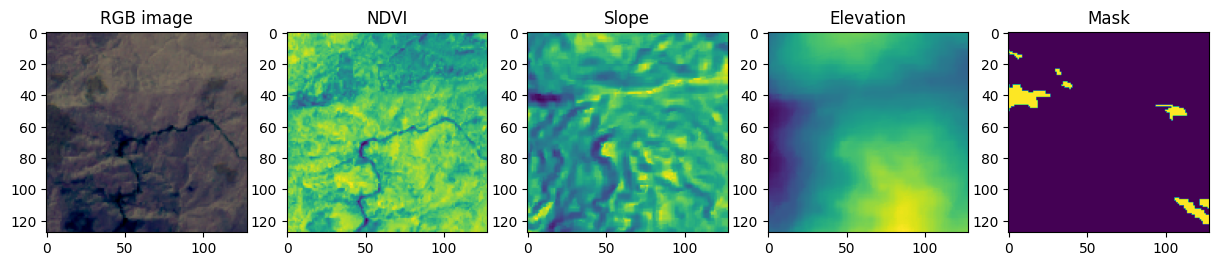

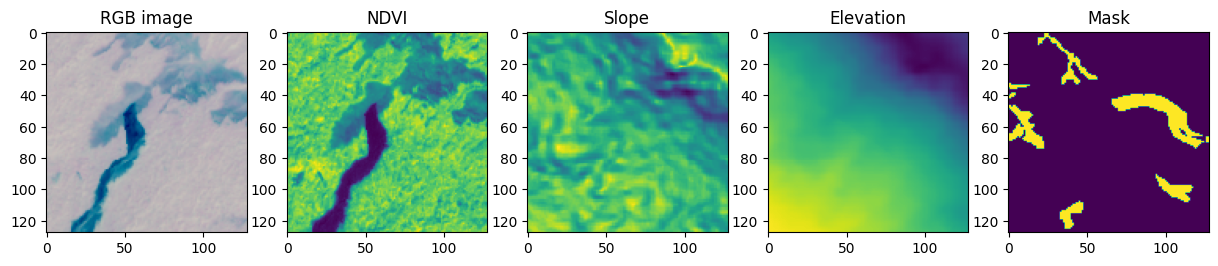

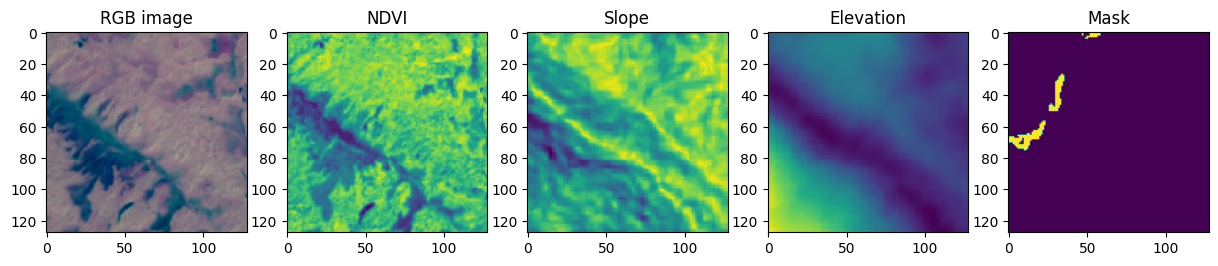

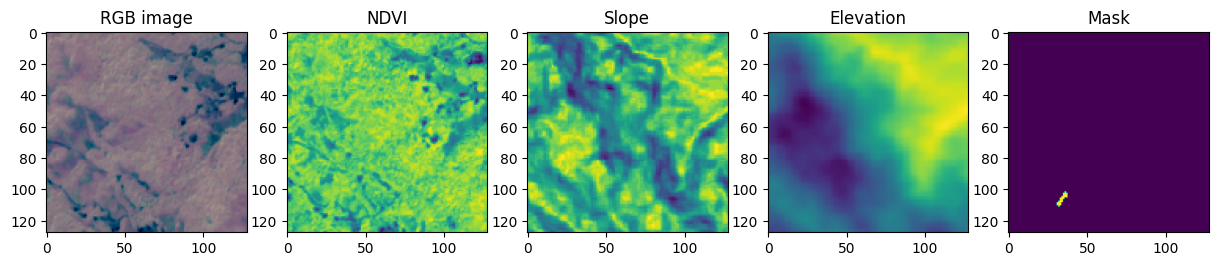

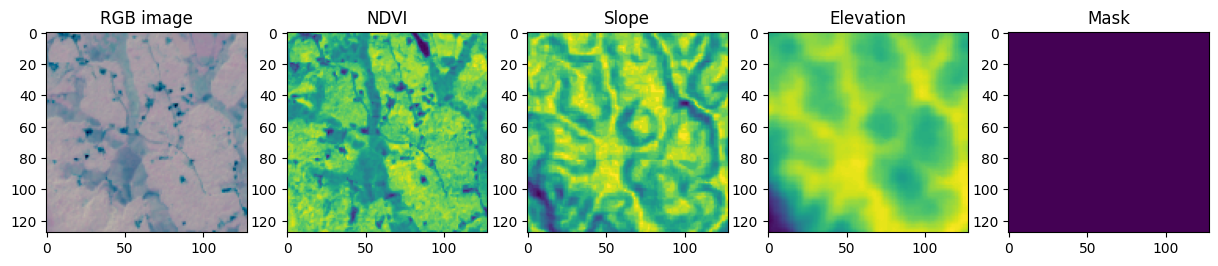

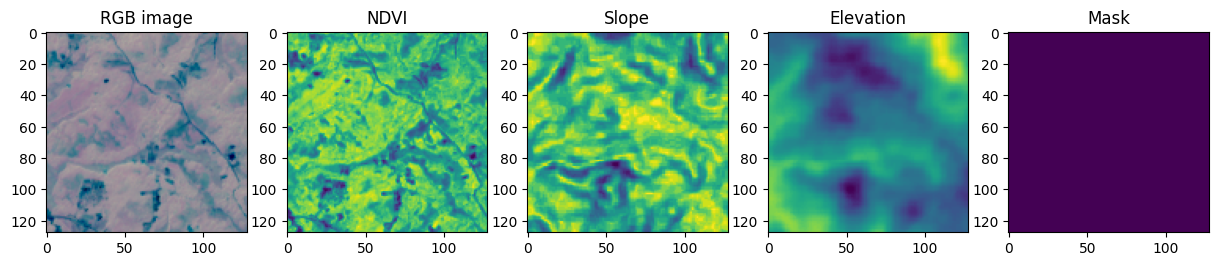

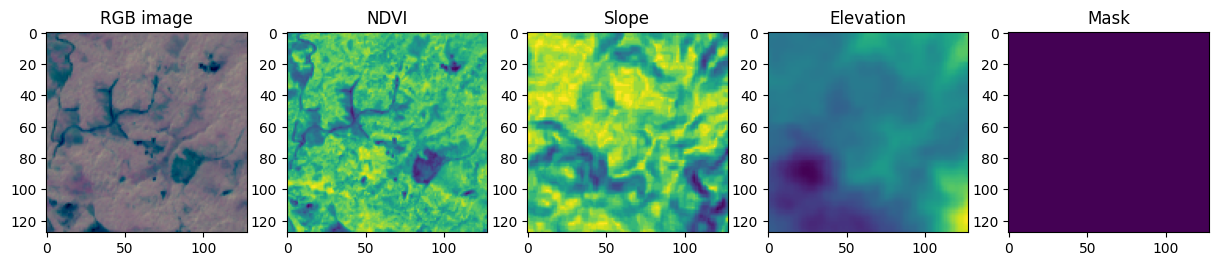

In [46]:
# TRAIN_XX = np.zeros((3799, 128, 128, 6))
# TRAIN_YY = np.zeros((3799, 128, 128, 1))
img = 20
for i in range(img):
    fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))
    ax1.set_title("RGB image")
    ax2.set_title("NDVI")
    ax3.set_title("Slope")
    ax4.set_title("Elevation")
    ax5.set_title("Mask")
    ax1.imshow(TRAIN_XX[i, :, :, 0:3])
    ax2.imshow(TRAIN_XX[i, :, :, 3])
    ax3.imshow(TRAIN_XX[i, :, :, 4])
    ax4.imshow(TRAIN_XX[i, :, :, 5])
    ax5.imshow(TRAIN_YY[i, :, :, 0])